In [1]:
import metatab
import pandas as pd

doc = metatab.open_package('..') # Assumes you started Jupyter in the same dir as the metadata file

list(r.name for r in doc.resources())

pop_df = doc.first_resource('total_pop').dataframe()
gdp_df = doc.first_resource('country_gdp').dataframe()
md_df = doc.first_resource('migration').dataframe()


In [15]:
# CPC == USD, current prices, current PPPs
# T_GDP == Gross Domestic Product (GDP); millions
gdp2014=gdp_df[ (gdp_df.subject_code == 'T_GDPPOP') & (gdp_df.time==2014) & ( gdp_df.measure_code=='CPC')]
md2014 = md_df[ (md_df.year==2014) & (md_df['var'] == 'B11') & (md_df.country_code == 'TOT')] # 'Inflows of foreign population by nationality'
pop2014 = pop_df[(pop_df.variant == 'Medium') & ( pop_df.time == 2014)]

In [16]:
l1 = md2014[['country','cou']].drop_duplicates()
l2 = pop2014[['location','locid']].drop_duplicates()

In [17]:
index = l2.merge(l1, how='outer', left_on='location', right_on='country')
index.loc[index.location=='United States of America',['country','cou']] = ['United States', 'USA']
index.dropna(inplace=True)
index.to_csv('/tmp/countries.csv')


In [18]:
migrate = md2014[['country', 'cou', 'country_of_birth_nationality', 'in_migration_count']].groupby('cou').sum()\
.sort_values('in_migration_count', ascending=False).reset_index()

merged = index\
.merge(gdp2014, left_on='cou', right_on='location', suffixes=('','_gdp'))\
.merge(pop2014, on='locid', suffixes=('','_pop'))\
.merge(migrate, on='cou', suffixes=('','_md'))

gpop = merged['location cou gdp poptotal growthrate popdensity in_migration_count'.split()].copy()


In [19]:
gpop['migrant_per_pop'] = gpop.in_migration_count / gpop.poptotal
gpop.sort_values('migrant_per_pop', ascending=False)

,location,cou,gdp,poptotal,growthrate,popdensity,in_migration_count,migrant_per_pop
18,Luxembourg,LUX,100141.269930,556.573,1.8755,214.893,21024.0,37.774021
28,Switzerland,CHE,61282.089756,8211.383,1.0573,207.799,152106.0,18.523798
1,Austria,AUT,48645.567989,8516.916,0.3244,103.349,154260.0,18.112190
21,New Zealand,NZL,36889.170931,4495.482,0.7324,17.073,80289.0,17.859931
10,Germany,DEU,47099.457528,80646.262,0.0524,231.370,1342529.0,16.647132
12,Iceland,ISL,44330.785913,327.318,0.6417,3.265,4348.0,13.283718
22,Norway,NOR,65716.476348,5147.970,1.2163,14.094,61429.0,11.932665
2,Belgium,BEL,45044.442682,11226.322,0.6470,370.750,123569.0,11.007078
27,Sweden,SWE,46445.822135,9703.247,0.7820,23.647,106100.0,10.934484
13,Ireland,IRL,51337.493754,4675.164,0.2841,67.864,49000.0,10.480916


<IPython.core.display.Javascript object>


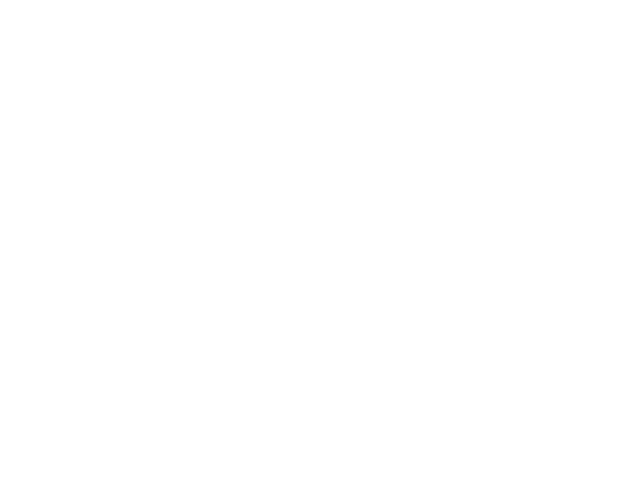

In [29]:

import matplotlib.pyplot
%matplotlib notebook
matplotlib.style.use('ggplot')
gpop.plot.scatter(x='migrant_per_pop',y='gdp')

In [23]:
gpop.corr()


,gdp,poptotal,growthrate,popdensity,in_migration_count,migrant_per_pop
gdp,1.000000,-0.013869,0.544257,0.151443,0.146481,0.812154
poptotal,-0.013869,1.000000,0.035358,0.016351,0.675689,-0.275190
growthrate,0.544257,0.035358,1.000000,0.008752,-0.026165,0.492845
popdensity,0.151443,0.016351,0.008752,1.000000,0.140493,0.074832
in_migration_count,0.146481,0.675689,-0.026165,0.140493,1.000000,0.058945
migrant_per_pop,0.812154,-0.275190,0.492845,0.074832,0.058945,1.000000


In [34]:
gdpm=gdp_df[ (gdp_df.subject_code == 'T_GDP') & ( gdp_df.measure_code=='CPC')]\
[[ 'country','time','gdp']]

In [35]:
gdpm

,country,time,gdp
138,Australia,1970,5.897345e+04
139,Australia,1971,6.423313e+04
140,Australia,1972,6.995517e+04
141,Australia,1973,7.902420e+04
142,Australia,1974,8.647071e+04
143,Australia,1975,9.686846e+04
144,Australia,1976,1.044112e+05
145,Australia,1977,1.103890e+05
146,Australia,1978,1.234311e+05
147,Australia,1979,1.381176e+05


In [36]:
gdpm['time'] = pd.to_datetime(gdpm.time, format='%Y')

In [40]:
gdpm.set_index(['country','time']).pct_change(periods=4)

gdp
country                  time                 
Australia                1970-01-01        NaN
                         1971-01-01        NaN
                         1972-01-01        NaN
                         1973-01-01        NaN
                         1974-01-01   0.466265
                         1975-01-01   0.508076
                         1976-01-01   0.492545
                         1977-01-01   0.396901
                         1978-01-01   0.427433
                         1979-01-01   0.425826
                         1980-01-01   0.486169
                         1981-01-01   0.614158
                         1982-01-01   0.474060
                         1983-01-01   0.424577
                         1984-01-01   0.362446
                         1985-01-01   0.285428
                         1986-01-01   0.321286
                         1987-01-01   0.328986
                         1988-01-01   0.341725
                         1989-01-01   0.310566
                         1990-01-01   0.266040
                         1991-01-01   0.201378
                         1992-01-01   0.180460
                         1993-01-01   0.186572
                         1994-01-01   0.253042
                         1995-01-01   0.289826
                         1996-01-01   0.270198
                         1997-01-01   0.265833
                         1998-01-01   0.253360
                         1999-01-01   0.258780
...                                        ...
Lithuania                2007-01-01   0.496647
                         2008-01-01   0.506474
                         2009-01-01   0.190408
                         2010-01-01   0.155998
                         2011-01-01   0.122031
                         2012-01-01   0.110456
                         2013-01-01   0.375407
                         2014-01-01   0.325343
                         2015-01-01   0.214604
Euro area (19 countries) 1995-01-01  86.868589
                         1996-01-01  83.773862
                         1997-01-01  83.541179
                         1998-01-01  86.166264
                         1999-01-01   0.180029
                         2000-01-01   0.214438
                         2001-01-01   0.226773
                         2002-01-01   0.219017
                         2003-01-01   0.193357
                         2004-01-01   0.172081
                         2005-01-01   0.157644
                         2006-01-01   0.205832
                         2007-01-01   0.255632
                         2008-01-01   0.253224
                         2009-01-01   0.179172
                         2010-01-01   0.119814
                         2011-01-01   0.096906
                         2012-01-01   0.063599
                         2013-01-01   0.125539
                         2014-01-01   0.121161
                         2015-01-01   0.110960

[1772 rows x 1 columns]